Enter the lower bound (a):  -10
Enter the upper bound (b):  10
Enter the number of intervals (n):  100


Left Endpoint: 1.77245385
Right Endpoint: 1.77245385
Midpoint: 1.77245385
Trapezoid: 1.77245385
Simpson's Rule: 1.77245385


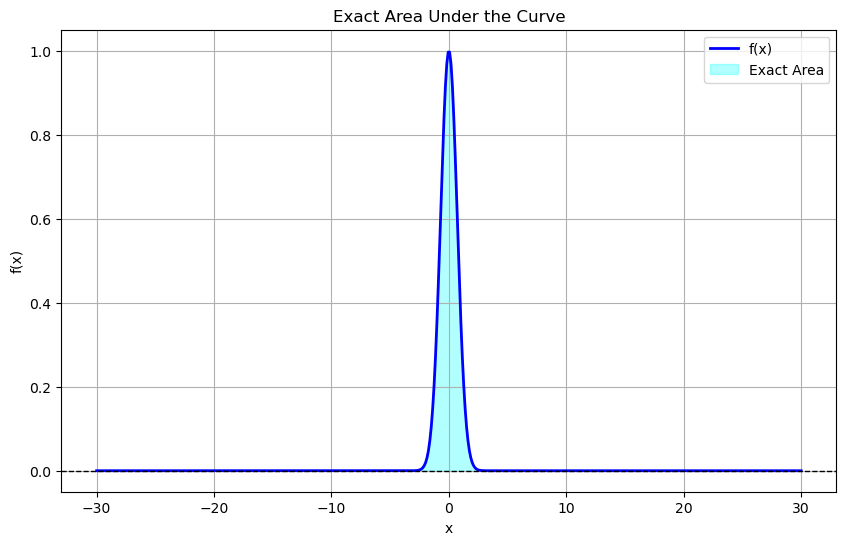

Choose approximation method (left, right, mid):  left


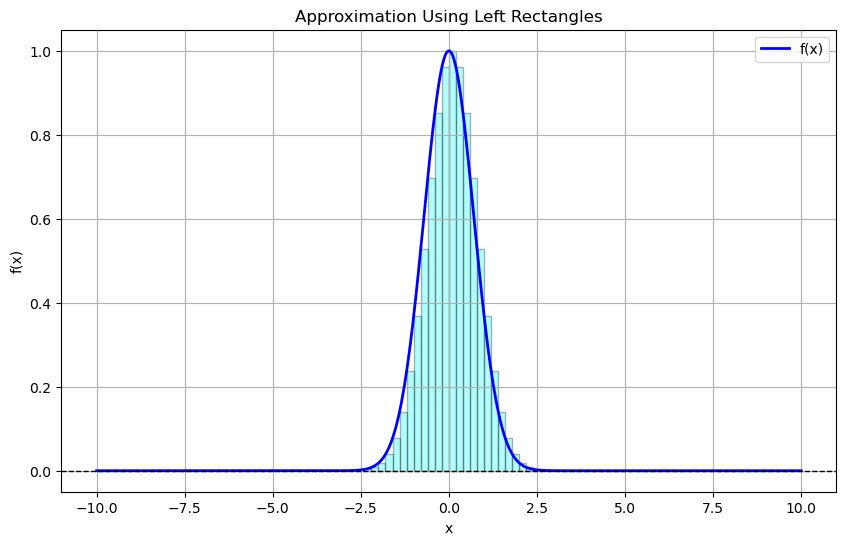

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Function to define the mathematical function
def f(x):
    return np.exp(-x**2)

# Left Endpoint Approximation
def left_endpoint(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b - h, n)  # Left endpoints
    return h * np.sum(f(x))

# Right Endpoint Approximation
def right_endpoint(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a + h, b, n)  # Right endpoints
    return h * np.sum(f(x))

# Midpoint Approximation
def midpoint(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a + h/2, b - h/2, n)  # Midpoints
    return h * np.sum(f(x))

# Trapezoid Rule
def trapezoid(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    return (h / 2) * np.sum(y[:-1] + y[1:])  # Trapezoidal sum

# Simpson's Rule
def simpsons(f, a, b, n):
    if n % 2 == 1:
        n += 1  # Simpson's rule requires an even number of intervals
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    return (h / 3) * (y[0] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-2:2]) + y[-1])

# Plot the exact area under the curve
def plot_exact_area(f, a, b):
    x_large = np.linspace(a - (b - a), b + (b - a), 500)  # Extend range beyond [a, b]
    y_large = f(x_large)

    # Exact bounds for shaded area
    x_shade = np.linspace(a, b, 500)
    y_shade = f(x_shade)

    plt.figure(figsize=(10, 6))
    plt.plot(x_large, y_large, label="f(x)", color="blue", linewidth=2)  # Full curve
    plt.fill_between(x_shade, y_shade, color="cyan", alpha=0.3, label="Exact Area")  # Shaded area
    plt.axhline(0, color="black", linewidth=1, linestyle="--")  # X-axis
    plt.title("Exact Area Under the Curve")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid()
    plt.show()
# Plot the approximate area using geometric rectangles
def plot_approximation(f, a, b, n, method):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    x_rect = x[:-1] if method == "left" else (x[:-1] + h / 2 if method == "mid" else x[1:])
    y_rect = f(x_rect)

    plt.figure(figsize=(10, 6))
    x_fine = np.linspace(a, b, 500)
    plt.plot(x_fine, f(x_fine), label="f(x)", color="blue", linewidth=2)

    # Plot rectangles
    for i in range(n):
        if method == "left":
            rect_x = [x[i], x[i], x[i + 1], x[i + 1]]
            rect_y = [0, y_rect[i], y_rect[i], 0]
        elif method == "mid":
            rect_x = [x[i], x[i], x[i + 1], x[i + 1]]
            rect_y = [0, y_rect[i], y_rect[i], 0]
        elif method == "right":
            rect_x = [x[i + 1], x[i + 1], x[i], x[i]]
            rect_y = [0, y_rect[i], y_rect[i], 0]
        plt.fill(rect_x, rect_y, color="cyan", edgecolor="black", alpha=0.3)

    plt.axhline(0, color="black", linewidth=1, linestyle="--")
    plt.title(f"Approximation Using {method.capitalize()} Rectangles")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid()
    plt.show()

# Main Program
if __name__ == "__main__":
    # User input for bounds and number of intervals
    a = float(input("Enter the lower bound (a): "))
    b = float(input("Enter the upper bound (b): "))
    n = int(input("Enter the number of intervals (n): "))

    print(f"Left Endpoint: {left_endpoint(f, a, b, n):.8f}")
    print(f"Right Endpoint: {right_endpoint(f, a, b, n):.8f}")
    print(f"Midpoint: {midpoint(f, a, b, n):.8f}")
    print(f"Trapezoid: {trapezoid(f, a, b, n):.8f}")
    print(f"Simpson's Rule: {simpsons(f, a, b, n):.8f}")

    # Plot exact area
    plot_exact_area(f, a, b)

    # Plot one approximation method
    approx_method = input("Choose approximation method (left, right, mid): ").strip().lower()
    plot_approximation(f, a, b, n, approx_method)
